In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
mnist = pd.read_csv('train.csv')

# Separate features (pixel values) and labels
X = mnist.drop('label', axis=1)  # Features (pixel values)
y = mnist['label']  # Labels

# Display the shape of features and labels
print("Shape of features:", X.shape)
print("Shape of labels:", y.shape)

Shape of features: (42000, 784)
Shape of labels: (42000,)


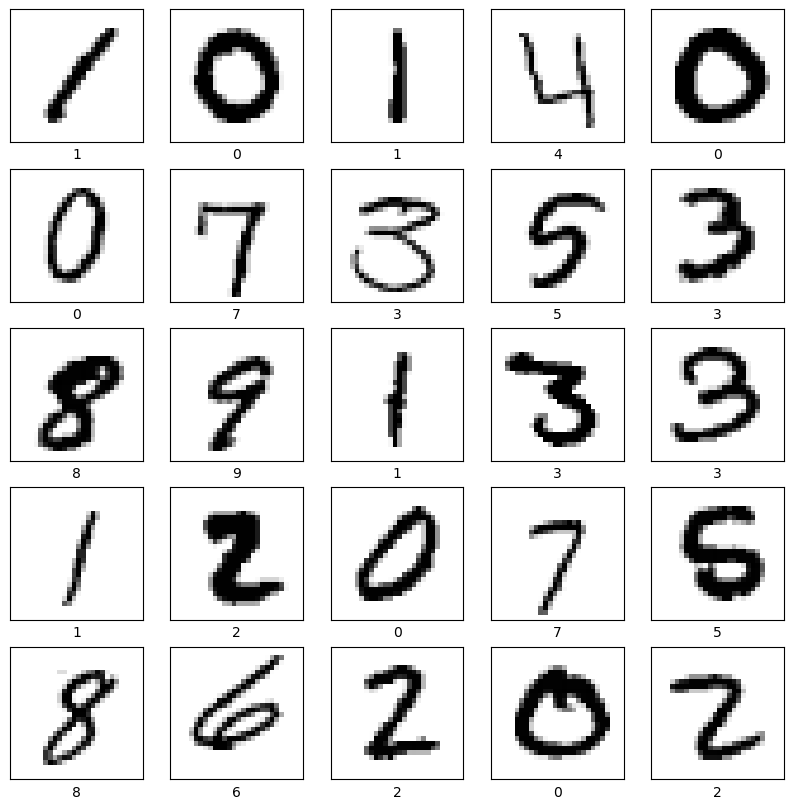

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Assuming each row of 'X' represents a flattened image of size 28x28 pixels
    # Reshape the flattened image to 28x28 and plot it
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap=plt.cm.binary)
    # Assuming 'y' contains labels for each image
    plt.xlabel(y.iloc[i])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the pixel values to a range of 0 to 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [17]:
# Evaluate the model on the test set
accuracy = svm_classifier.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9727380952380953


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Combine the training and testing sets
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Scale the combined data to a range of 0 to 1
scaler = MinMaxScaler()
X_combined_scaled = scaler.fit_transform(X_combined)


In [19]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier on the scaled combined data
svm_classifier.fit(X_combined_scaled, y_combined)


SVC(random_state=42)

In [20]:
test = pd.read_csv('test.csv')

In [21]:
# Assuming 'test' contains the unlabeled test data
# Scale the test data using the same scaler used for training data
X_test_scaled = scaler.transform(test)

# Make predictions using the trained SVC model
predictions = svm_classifier.predict(X_test_scaled)

# Display the predicted labels
print("Predicted labels:", predictions)


Predicted labels: [2 0 9 ... 3 9 2]


In [22]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [23]:
svc = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label':  predictions })

In [24]:
svc

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [26]:
svc.to_csv("svc.csv",index=False)